# 1

In [972]:
import json
from pprint import pprint

data = json.load(open('reduced_dblp.json'))

#pprint(data)

In [973]:
'''for i in data[0]:
    print(i)'''
for i in data[0]['authors']:
    print(i['author'])
    print(i['author_id'])

h&eacute;lio marcos paz de almeida
255206
dorgival olavo guedes neto
255207
wagner meira jr.
16585
mohammed j. zaki
255208


In [974]:
#search for all authors with conference ID
def searchConfId(confId):
    author_list = []
    for item in data:
        conferenceId = item["id_conference_int"]
        if(confId == conferenceId):
            authors = item["authors"]
            for author in authors:
                authorId = author["author_id"]
                author_list.append(authorId)
    return author_list
            

In [62]:
len(searchConfId(3345))

731

In [14]:
data[0]["authors"][0]["author_id"]

255206

In [975]:
## Convert dictionary to author:{list of publication}

#author:{list of publication}

dict_author_pub = {}
dict_author_conf = {}
dict_publication = {}
author_publication_list = []


for item in data:
    publicationId = item["id_publication_int"]
    publicationTitle = item["title"]
    dict_publication = {}
    dict_publication[publicationId] = publicationTitle

    authors = item["authors"]  
    for author in authors:
        author_publication_list = []
        
        authorId= author["author_id"]
        authorName = author["author"]
        
        if authorId in dict_author_pub.keys():
            author_publication_list = dict_author_pub[authorId]
            author_publication_list.append(dict_publication)
            dict_author_pub[authorId] = author_publication_list
            
        else:
            author_publication_list.append(dict_publication)
            dict_author_pub[authorId] = author_publication_list

        
    

In [976]:
len(dict_author_pub)

7771

In [314]:
#dict_author_pub

In [977]:
'''
dictt={}
test = dict_author[93126]
for item in test:
    key = list(item.keys())[0]
    value = list(item.values())[0]
    dictt[key] =value
'''    
def listToDict(pubList):
    dictt={}
    for item in pubList:
        key = list(item.keys())[0]
        value = list(item.values())[0]
        dictt[key] =value
    return dictt

def jaccard(p1,p2):
    p1= listToDict(p1)
    p2= listToDict(p2)
    p1_int_p2=len(set(p1).intersection(p2))
    result = 1 - (p1_int_p2 / (len(p1) + len(p2)- p1_int_p2))
    
    return result
    

In [408]:
len(data)

3096

In [978]:
# create graph
import networkx as nx
G=nx.Graph()
for item in data:
    authors = item["authors"]  
    for author in authors:
        for author2 in authors:
            aId= author["author_id"]
            a2Id= author2["author_id"]
            G.add_node(aId)
            G.add_node(a2Id)
            if((aId != a2Id) and (not(G.has_edge(aId,a2Id)))) :
                r_weight= jaccard(dict_author_pub[aId],dict_author_pub[a2Id])
                #print(r_weight)
                G.add_edge(aId,a2Id, weight=r_weight)

In [979]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 7771
Number of edges: 16488
Average degree:   4.2435


In [420]:
len(dict_author_pub)

7771

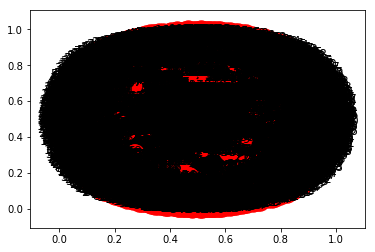

In [316]:
import matplotlib.pyplot as plt
nx.draw_networkx(G,label=False)
plt.show()

# 2a (degree, between, closeness)

In [317]:
#givena conference ID return the subgraph induced by the set of authors who published at the input conference at least once
conf=int(input())
H = G.subgraph(searchConfId(conf))

3052


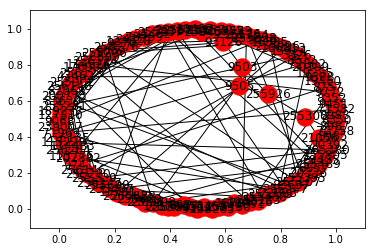

In [318]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
#g1 = nx.petersen_graph()
nx.draw_networkx(H, with_labels= True)
plt.show()

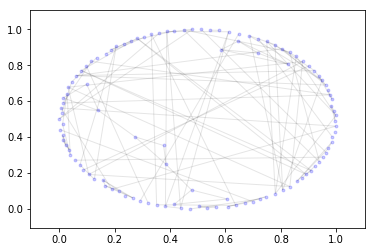

In [319]:
from pylab import show
# create the layout
pos = nx.spring_layout(H)
# draw the nodes and the edges (all)
nx.draw_networkx_nodes(H,pos,node_color='b',alpha=0.2,node_size=8)
nx.draw_networkx_edges(H,pos,alpha=0.1)
plt.show()

**Degree**:

which is defined as the number of links incident upon a node 

In [320]:
degree=sorted(nx.degree(H).values(),reverse=True) #value

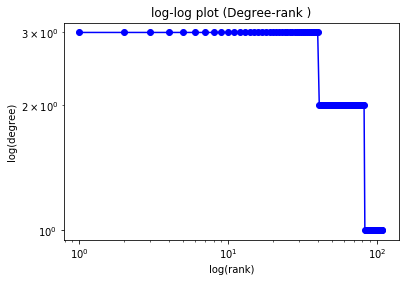

In [321]:
#plot degree in a loglog plot
import matplotlib.pyplot as plt
degree_sequence=sorted(nx.degree(H).values(),reverse=True) # degree sequence
#print "Degree sequence", degree_sequence
dmax=max(degree_sequence)

plt.loglog(degree_sequence,'b-',marker='o')
plt.title("log-log plot (Degree-rank )")
plt.ylabel("log(degree)")
plt.xlabel("log(rank)")
plt.show()

**Betweenness**:

Betweenness centrality quantifies the number of times a node acts as a bridge along the shortest path between two other nodes.

In [533]:
betw=nx.betweenness_centrality(H,  normalized=True, weight="weight", endpoints=False, seed=None)

In [534]:
import operator
print(sorted(betw.items(),
            key=operator.itemgetter(1),reverse=True))

[(255926, 0.0020202020202020206), (9503, 0.00202020202020202), (255300, 0.0015288015288015292), (93126, 0.001528801528801529), (23845, 0.0010328510328510329), (21056, 0.0010328510328510329), (255206, 0.0009759759759759761), (255487, 0.0009759759759759761), (113776, 0.0009759759759759761), (9068, 0.0009759759759759761), (256146, 0.0009759759759759761), (72882, 0.0009759759759759761), (255689, 0.0007462007462007462), (255759, 0.0007462007462007462), (255207, 0.0005437255437255436), (255488, 0.0005437255437255436), (255247, 0.0005437255437255436), (9046, 0.0005437255437255436), (256147, 0.0005437255437255436), (72883, 0.0005437255437255436), (255690, 0.00033215033215033216), (255760, 0.00033215033215033216), (255328, 0.0003276003276003276), (175195, 0.0003003003003003003), (16585, 0.0002184002184002184), (255280, 0.0002184002184002184), (255339, 0.0002184002184002184), (210891, 0.0002184002184002184), (3476, 0.0002184002184002184), (82068, 0.0002184002184002184), (9069, 0.0002184002184002

**Most important** nodes in the *subgraph*

In [325]:
#most important node 
def most_important(G):
        ranking = nx.betweenness_centrality(G).items()
        r = [x[1] for x in ranking]
        m = sum(r)/len(r) # mean centrality
        t = m*3 # threshold, we keep only the nodes with 3 times the mean
        Gt = G.copy()
        for k, v in ranking:
            if v < t:
                Gt.remove_node(k)
        return Gt

In [326]:
Gt=most_important(H)

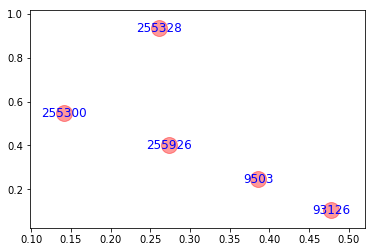

In [327]:
# draw the most important nodes with a different style
nx.draw_networkx_nodes(Gt,pos,node_color='r',alpha=0.4,node_size=254)
# also the labels this time
nx.draw_networkx_labels(Gt,pos,font_size=12,font_color='b')
show()

**Closeness**:

In a connected graph, the normalized closeness centrality (or closeness) of a node is the average length of the shortest path between the node and all other nodes in the graph. Thus the more central a node is, the closer it is to all other nodes.

In [328]:
clos=nx.closeness_centrality(H)

In [329]:
#top ten nodes!
def get_top_keys(dictionary, top):
    items = sorted(dictionary.items(),reverse=True, key=lambda x: x[1])
    return list(map(lambda x: x[0], items[:top]))

In [330]:
top_clo_cen = get_top_keys(clos,10)

In [331]:
top_clo_cen

[255926, 9503, 93126, 9505, 255300, 255206, 255207, 16585, 255208, 255405]

In [332]:
clos_graph=H.subgraph(top_clo_cen)

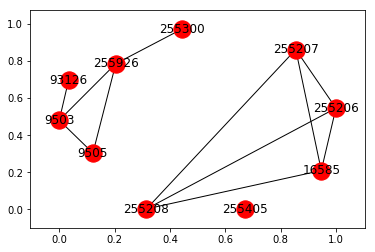

In [334]:
nx.draw_networkx(clos_graph, with_labels= True)
plt.show()

# 2b (hop-distance)

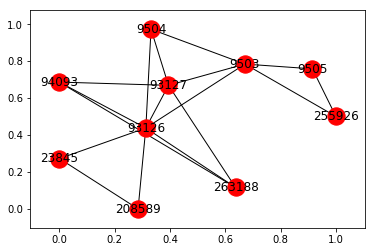

In [535]:
c=nx.ego_graph(G,93126,2)
nx.draw_networkx(c)
plt.show()

In [447]:
print(nx.info(c))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 17
Average degree:   3.4000


In [541]:
#len(G.nodes())
import matplotlib.pyplot as plt
def hopDistance(author,d):
    degreeList =[]
    for node in G.nodes():
        if nx.has_path(G,author,node):
            edges = len(nx.shortest_path(G, source=author, target=node, weight=None)) - 1
            if(edges <= d):
                degreeList.append(node)
    

    H = G.subgraph(degreeList)
    nx.draw_networkx(H, with_labels= True)
    plt.show()
    print(len(degreeList))
    print(nx.info(H))
    print(degreeList)

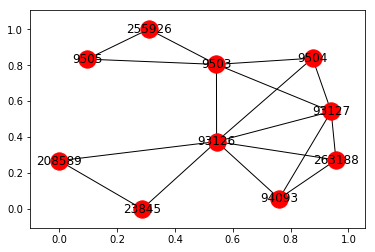

10
Name: 
Type: Graph
Number of nodes: 10
Number of edges: 17
Average degree:   3.4000
[93126, 23845, 208589, 255926, 9503, 9505, 93127, 94093, 263188, 9504]


In [542]:

hopDistance(93126,2)

# 3 (erdos)

### Shortest Path function

Check Aris id

In [792]:
Aris_id=''
for i in data:
    for j in i['authors']:
        if(j['author'])=='aris anagnostopoulos':
            Aris_id=j['author_id']

*connected nodes*

In [1023]:
connect=sorted(nx.connected_components(G), key=len, reverse=True) #connected nodes
#check if two nodes are connected
def Check(connect,src,dest):
    c=''
    for i in connect:
        if src in i: 
            if dest in i:
                c='True'
            else:
                c='False'
    return c

In [1024]:
def dijkstra(graph,src,dest,visited=[],distances={},predecessors={}):
    """ calculates a shortest path tree routed in src
    """    
    # a few sanity checks
    #if  not graph.has_node(src):
    if (graph.has_node(src) == False) or (graph.has_node(dest) == False):
        return ('no one node with this ID')
    
    
    if Check(connect,src,dest)=='True': #check if are connected
                # ending condition
        if src == dest:
            #print('source and destination is the same node so cost is: '+str(0))
            # We build the shortest path and display it
            path=[]
            pred=dest
            while pred != None:
                path.append(pred)
                pred=predecessors.get(pred,None)
            print('shortest path: '+str(path)+" cost="+str(distances[dest])) 
        else :     
            
            if not visited: 
                distances[src]=0
            # visit the neighbors
            for neighbor in graph[src] :
                if neighbor not in visited:
                    new_distance = distances[src] + graph[src][neighbor]['weight']
                    if new_distance < distances.get(neighbor,float('inf')): # if neighbor has no value add default value inf
                        distances[neighbor] = new_distance
                        predecessors[neighbor] = src
            # mark as visited
            visited.append(src)
            # now that all neighbors have been visited: recurse                         
            # select the non visited node with lowest distance 'x'
            # run Dijskstra with src='x'
            unvisited={}
            for k in graph:
                if k not in visited:
                    unvisited[k] = distances.get(k,float('inf'))        
            x=min(unvisited, key=unvisited.get)
            return  dijkstra(graph,x,dest,visited,distances,predecessors)

            '''except RecursionError:
                return ('No connected nodes')'''
    else:
        return ('No connected nodes')



In [1025]:
dijkstra(G,16617,Aris_id)

shortest path: [256176, 16617] cost=0.9473684210526316


In [969]:
nx.shortest_path_length(G,16390,20405,weight='weight')

9.987265512265514

** In this way i removed all nodes that are alone** 

In [1164]:
# i create dict with key and his node
dict1={}
for i in G.nodes():
    for j in G[i]:
        if i not in dict1.keys():
            dict1[i]={}
            dict1[i][j]=G[i][j]['weight']
        else:
            dict1[i][j]=G[i][j]['weight']
#G[Aris_id]

In [1204]:
#very fast
import heapq

def shortestPath(graph,start, end):
    queue = [(0, start, [])]
    seen= set()
    while queue:
        (cost, v, path) = heapq.heappop(queue)
        if v not in seen:
            path = path + [v]
            seen.add(v)
            if v == end:
                return cost
            for (next, c) in graph[v].items():
                heapq.heappush(queue, (cost + c, next, path))
    
    return float('inf')



In [1031]:
connect

[{114691,
  16388,
  352261,
  16390,
  16392,
  163849,
  10,
  16404,
  16405,
  311319,
  16411,
  114716,
  16415,
  524319,
  114722,
  24612,
  73765,
  524327,
  114729,
  524329,
  114735,
  114738,
  114739,
  16435,
  426037,
  16438,
  426038,
  172088,
  16442,
  114748,
  163903,
  524355,
  16452,
  524358,
  16454,
  524360,
  16457,
  524364,
  204880,
  155729,
  114768,
  16467,
  24660,
  16469,
  204881,
  82011,
  122973,
  524383,
  8289,
  524385,
  97,
  16486,
  16487,
  8297,
  8301,
  8302,
  8303,
  524400,
  524401,
  8306,
  16494,
  16500,
  16499,
  16502,
  8311,
  8312,
  8315,
  548987,
  786559,
  16513,
  123011,
  114820,
  114821,
  16520,
  16521,
  278669,
  16526,
  16528,
  254097,
  8338,
  16529,
  8336,
  450709,
  8343,
  16536,
  16538,
  16542,
  524448,
  8353,
  524449,
  123044,
  16553,
  16554,
  16555,
  16556,
  16557,
  16558,
  450734,
  8368,
  8369,
  8370,
  524464,
  524465,
  8365,
  16562,
  295103,
  16579,
  16580,
  270

In [1205]:
shortestPath(dict1,16390,20405)

9.987265512265514

In [1206]:
shortestPath(dict1,16617,Aris_id)

0.9473684210526316

In [1208]:
Check(connect,16390,20405)

'True'

# 3B

In [1209]:
mynode=[16390,Aris_id]

In [1226]:
shortestPath(dict1,255207,Aris_id)

inf

In [1235]:
'''minim=1000
#listaempty=[]
for j in mynode:
    for i in dict1:
        if Check(connect,i,j)=='True':
            #listaempty.append((i,j,shortestPath(dict1,i,j)))
            value=shortestPath(dict1,i,j)
            if value < minim:
                minim=value
        else:
            pass'''

In [1230]:
for j in mynode:
    print(j)

16390
256176


In [1255]:
newlist=[]
newdict={}
authordict ={}
for node in dict1:
    minim=10000
    newdict={}
    for groupNode in mynode:
        
        if Check(connect,node,groupNode)=='True':
            c=shortestPath(dict1,node,groupNode)
            if c<minim:
                minim=c
                newdict[node]=groupNode
    
    if (bool(newdict)):
        #print(newdict)
        if(groupNode in authordict.keys()):
            newlist= authordict[groupNode]
            #newdict[i] it will return closest author
            newlist.append(newdict.keys())
            authordict[groupNode]=newlist
                #newlist[(i,j)]=c
        else:
            newlist.append(newdict.keys())
            authordict[groupNode]=newlist
            
        

In [1256]:
authordict[Aris_id]

[dict_keys([20405]),
 dict_keys([20407]),
 dict_keys([255405]),
 dict_keys([9308]),
 dict_keys([175195]),
 dict_keys([17178]),
 dict_keys([255537]),
 dict_keys([21462]),
 dict_keys([255688]),
 dict_keys([255689]),
 dict_keys([255690]),
 dict_keys([255691]),
 dict_keys([15924]),
 dict_keys([8985]),
 dict_keys([8987]),
 dict_keys([8988]),
 dict_keys([19285]),
 dict_keys([19460]),
 dict_keys([8612]),
 dict_keys([256176]),
 dict_keys([256177]),
 dict_keys([255328]),
 dict_keys([114483]),
 dict_keys([202882]),
 dict_keys([256135]),
 dict_keys([256482]),
 dict_keys([20392]),
 dict_keys([8857]),
 dict_keys([8819]),
 dict_keys([271611]),
 dict_keys([16249]),
 dict_keys([19355]),
 dict_keys([16145]),
 dict_keys([18433]),
 dict_keys([223848]),
 dict_keys([271612]),
 dict_keys([175489]),
 dict_keys([271613]),
 dict_keys([17368]),
 dict_keys([271614]),
 dict_keys([17611]),
 dict_keys([16521]),
 dict_keys([168357]),
 dict_keys([271615]),
 dict_keys([271616]),
 dict_keys([17509]),
 dict_keys([17973]

In [1260]:
shortestPath(dict1,17178,Aris_id)

7.617124542124543

In [1261]:
shortestPath(dict1,17178,16390)

11.042124542124542

In [1258]:
mynode

[16390, 256176]

In [1244]:
shortestPath(dict1,16390,20405)

9.987265512265514

# another dijkstra

**Another kind of shortest**

In [832]:
sourceNode = 255300
dictt = {}
visitedNodes={}

visitedNodes[sourceNode]={}
dictt[sourceNode]={}
def shorthestPath(unvisitedNode):
    for node in G.neighbors(unvisitedNode):
        if(sourceNode == unvisitedNode):
            dictt[sourceNode][node] = G[unvisitedNode][node]['weight']
        else:
            if(node in dictt[sourceNode].keys()):
                if(G[unvisitedNode][node]['weight'] +  dictt[sourceNode][unvisitedNode] < dictt[sourceNode][node] ):
                    dictt[sourceNode][node] = G[unvisitedNode][node]['weight']
            else:
                dictt[sourceNode][node] = dictt[sourceNode][unvisitedNode] + G[unvisitedNode][node]['weight']
    
    exractedVisitedNodes = { k : dictt[sourceNode][k] for k in set(dictt[sourceNode]) - set(visitedNodes[sourceNode]) }
    #print("exractedVisitedNodes: ")
    #print(exractedVisitedNodes)
    if (len(exractedVisitedNodes) == 0):
        return dictt[sourceNode]
    minNode = min(exractedVisitedNodes.items(), key=lambda x: x[1])
    visitedNodes[sourceNode][minNode[0]]="visited"
    #print(visitedNodes[sourceNode])
    #print(minNode[0])
    shorthestPath(minNode[0])

In [834]:
a = shorthestPath(255300)

In [835]:
print(a)

{21056: 0.5, 70758: 0.5, 695172: 0.5, 255926: 0.6666666666666667, 255300: 1.0, 9503: 1.3333333333333335, 9505: 1.3333333333333335, 217561: 1.8333333333333335, 59385: 1.8333333333333335, 9504: 1.8333333333333335, 93126: 2.0833333333333335, 93127: 2.0, 94093: 2.5, 263188: 2.5, 23845: 2.75, 208589: 2.75}


In [823]:
nx.shortest_path_length(G,18263,Aris_id,weight='weight')

0.8

In [838]:
lista1=[16390,8365,118900,188140,9763]

In [839]:
lista1

[16390, 8365, 118900, 188140, 9763]

In [863]:
for i in G.nodes():
    print(i,16390)
    if Check(connect,i,16390)=='True':
        print('connect')
    else:
        print('not connect')

255206 16390
not connect
255207 16390
not connect
16585 16390
not connect
255208 16390
not connect
255280 16390
not connect
255281 16390
not connect
3326 16390
not connect
20405 16390
connect
20407 16390
connect
255339 16390
not connect
205380 16390
not connect
115228 16390
not connect
210891 16390
not connect
255394 16390
not connect
255395 16390
not connect
255405 16390
connect
9308 16390
connect
175195 16390
connect
17178 16390
connect
176994 16390
not connect
73799 16390
not connect
24151 16390
not connect
255487 16390
not connect
255488 16390
not connect
3476 16390
not connect
255489 16390
not connect
166813 16390
not connect
13781 16390
not connect
9741 16390
not connect
8757 16390
not connect
255537 16390
connect
21462 16390
connect
255578 16390
not connect
113776 16390
not connect
255247 16390
not connect
82068 16390
not connect
255673 16390
not connect
255688 16390
connect
255689 16390
connect
255690 16390
connect
255691 16390
connect
113346 16390
not connect
15924 16390
conne

59413 16390
not connect
115211 16390
not connect
99555 16390
not connect
118186 16390
not connect
272738 16390
not connect
16343 16390
not connect
272760 16390
not connect
272761 16390
not connect
16265 16390
connect
272772 16390
connect
18758 16390
connect
255912 16390
connect
17630 16390
connect
272734 16390
not connect
205795 16390
not connect
19433 16390
not connect
272172 16390
connect
16211 16390
connect
272869 16390
connect
272870 16390
connect
272170 16390
connect
16110 16390
not connect
272872 16390
not connect
16117 16390
not connect
16115 16390
not connect
17136 16390
not connect
271787 16390
not connect
272875 16390
not connect
118950 16390
not connect
269814 16390
not connect
15997 16390
not connect
272890 16390
not connect
16058 16390
not connect
16670 16390
not connect
15831 16390
not connect
233082 16390
not connect
272901 16390
not connect
272902 16390
not connect
113549 16390
not connect
72748 16390
not connect
24903 16390
not connect
272903 16390
connect
15875 16390


19443 16390
connect
265798 16390
connect
199626 16390
connect
372069 16390
connect
18965 16390
connect
17360 16390
connect
16278 16390
connect
17435 16390
connect
154591 16390
connect
228162 16390
connect
28556 16390
connect
225366 16390
connect
85353 16390
connect
10212 16390
connect
21042 16390
connect
21044 16390
connect
414413 16390
connect
18804 16390
connect
74708 16390
connect
1829 16390
connect
66957 16390
connect
310722 16390
connect
440374 16390
connect
16912 16390
connect
3962 16390
connect
27917 16390
not connect
118231 16390
not connect
18082 16390
not connect
346920 16390
connect
22359 16390
connect
486264 16390
connect
216432 16390
connect
489300 16390
not connect
312281 16390
not connect
312280 16390
not connect
8358 16390
not connect
109112 16390
not connect
489339 16390
not connect
489340 16390
not connect
489341 16390
not connect
175447 16390
connect
289187 16390
connect
4669 16390
connect
447863 16390
connect
18318 16390
connect
230364 16390
connect
308413 16390
con

114679 16390
not connect
523682 16390
not connect
398582 16390
not connect
11996 16390
connect
115005 16390
connect
523690 16390
not connect
69772 16390
not connect
19807 16390
not connect
85925 16390
connect
17525 16390
connect
17526 16390
connect
16362 16390
not connect
16363 16390
not connect
18894 16390
not connect
21182 16390
not connect
512035 16390
not connect
184135 16390
not connect
512046 16390
not connect
136325 16390
not connect
136323 16390
not connect
434418 16390
not connect
213375 16390
not connect
32471 16390
not connect
207560 16390
not connect
356569 16390
not connect
48686 16390
not connect
37556 16390
not connect
17298 16390
not connect
15189 16390
not connect
217975 16390
not connect
259597 16390
not connect
272554 16390
not connect
15949 16390
not connect
523709 16390
not connect
523714 16390
not connect
208069 16390
not connect
2607 16390
not connect
292065 16390
not connect
451415 16390
not connect
452379 16390
not connect
292193 16390
not connect
35946 16390
n

569661 16390
connect
490729 16390
connect
444361 16390
connect
207988 16390
not connect
560197 16390
not connect
226339 16390
not connect
569854 16390
not connect
569833 16390
not connect
17865 16390
not connect
356731 16390
connect
225859 16390
connect
465003 16390
connect
356488 16390
connect
6317 16390
not connect
6481 16390
not connect
112171 16390
not connect
226752 16390
not connect
204997 16390
not connect
205000 16390
not connect
465026 16390
not connect
112111 16390
not connect
569863 16390
not connect
444561 16390
not connect
461701 16390
not connect
269763 16390
not connect
207956 16390
not connect
569865 16390
not connect
490736 16390
not connect
569867 16390
not connect
569868 16390
not connect
569869 16390
not connect
226379 16390
not connect
355506 16390
not connect
204831 16390
not connect
111183 16390
not connect
569878 16390
not connect
21275 16390
not connect
226589 16390
not connect
112482 16390
not connect
226361 16390
not connect
569884 16390
not connect
207780 16

not connect
12573 16390
not connect
377 16390
not connect
369620 16390
connect
18673 16390
connect
523777 16390
connect
695329 16390
connect
115063 16390
connect
188041 16390
connect
113972 16390
not connect
198876 16390
not connect
450785 16390
not connect
97171 16390
not connect
140561 16390
not connect
86137 16390
not connect
9884 16390
connect
113290 16390
connect
683333 16390
connect
263309 16390
not connect
695346 16390
not connect
695347 16390
not connect
695348 16390
not connect
263310 16390
not connect
166235 16390
connect
99037 16390
connect
200383 16390
connect
123011 16390
connect
161526 16390
connect
114065 16390
connect
88287 16390
connect
20091 16390
connect
495247 16390
connect
682910 16390
connect
682780 16390
connect
102429 16390
connect
20030 16390
connect
636672 16390
not connect
104436 16390
not connect
56037 16390
not connect
104429 16390
connect
104430 16390
connect
19424 16390
connect
272323 16390
connect
519276 16390
connect
519275 16390
connect
20863 16390
not

639216 16390
not connect
434493 16390
not connect
454624 16390
not connect
9273 16390
not connect
490372 16390
not connect
736339 16390
not connect
736340 16390
not connect
736341 16390
not connect
143137 16390
not connect
736342 16390
not connect
736343 16390
not connect
112952 16390
connect
669715 16390
connect
8626 16390
connect
266274 16390
not connect
8662 16390
not connect
736311 16390
not connect
736345 16390
not connect
454594 16390
not connect
490567 16390
not connect
92636 16390
not connect
372655 16390
not connect
454667 16390
not connect
379606 16390
not connect
623510 16390
not connect
651435 16390
not connect
489219 16390
not connect
183258 16390
not connect
691096 16390
not connect
685225 16390
not connect
535326 16390
connect
25788 16390
connect
52482 16390
connect
536267 16390
connect
735892 16390
not connect
735671 16390
not connect
8601 16390
not connect
8723 16390
not connect
9349 16390
not connect
9212 16390
not connect
342438 16390
not connect
454443 16390
not con

connect
712714 16390
not connect
356385 16390
not connect
207764 16390
not connect
8500 16390
not connect
650724 16390
not connect
735883 16390
not connect
275237 16390
not connect
8872 16390
not connect
736001 16390
not connect
454233 16390
not connect
245477 16390
not connect
68896 16390
connect
70985 16390
connect
747352 16390
connect
70986 16390
connect
70988 16390
connect
490806 16390
not connect
403240 16390
not connect
518260 16390
not connect
219990 16390
connect
220402 16390
not connect
161202 16390
not connect
239266 16390
not connect
204888 16390
not connect
433425 16390
not connect
297269 16390
not connect
620160 16390
not connect
518111 16390
not connect
444390 16390
not connect
569780 16390
not connect
490807 16390
connect
490865 16390
connect
517856 16390
connect
517861 16390
connect
519627 16390
connect
112229 16390
connect
209181 16390
connect
259398 16390
connect
220126 16390
connect
292329 16390
connect
828350 16390
connect
569667 16390
not connect
828352 16390
not c

373531 16390
connect
492308 16390
not connect
551311 16390
not connect
543261 16390
not connect
19434 16390
not connect
18159 16390
not connect
2665 16390
not connect
19140 16390
not connect
447041 16390
not connect
18304 16390
not connect
371225 16390
not connect
45226 16390
not connect
295088 16390
not connect
118990 16390
not connect
85064 16390
not connect
279633 16390
not connect
279634 16390
not connect
829902 16390
not connect
83430 16390
connect
2309 16390
connect
106230 16390
connect
829903 16390
connect
109260 16390
not connect
251385 16390
not connect
97904 16390
not connect
115379 16390
not connect
113059 16390
not connect
431726 16390
not connect
373701 16390
not connect
77750 16390
not connect
289386 16390
not connect
23209 16390
not connect
593761 16390
not connect
829334 16390
not connect
15225 16390
not connect
20334 16390
connect
518582 16390
connect
523605 16390
not connect
264747 16390
connect
207818 16390
connect
111732 16390
connect
205127 16390
not connect
871104

In [852]:
Check(connect,255206,16390)

'False'

# IN caso non funziona

In [1067]:
lista2=[]
for i in G.nodes():
    for j in G[i]:
        lista2.append((i,j,G[i][j]['weight']))
        

In [ ]:
from collections import defaultdict
from heapq import *

def dijkstra6(edges, f, t):
    g = defaultdict(list)
    for l,r,c in edges:
        g[l].append((c,r))
    q, seen = [(0,f,())], set()
    while q:
        (cost,v1,path) = heappop(q)
        if v1 not in seen:
            seen.add(v1)
            path = (v1, path)
            if v1 == t: return (cost)

            for c, v2 in g.get(v1, ()):
                if v2 not in seen:
                    heappush(q, (cost+c, v2, path))

    return float("inf")

